In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import spatial
import time
import scipy.linalg
import healpy as hp

sys.path.insert(0,"/home/deparis/jupyter/pyemma/")
from pyemma import *
%cd "~/Emma"

%load_ext autoreload
%autoreload 2
%connect_info

/home/deparis/Emma
/home/deparis/Emma
{
  "stdin_port": 36643,
  "key": "9163d3ea-7138-443c-ae0d-0c66e46da4b9",
  "shell_port": 58946,
  "signature_scheme": "hmac-sha256",
  "ip": "127.0.0.1",
  "transport": "tcp",
  "control_port": 34671,
  "iopub_port": 58276,
  "hb_port": 34914
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /run/user/1003/jupyter/kernel-4bb79dbe-dc95-4af1-9dc9-916e786f87cb.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [2]:
runset=db.Runset()
runset.load()
runset.get_description()
runset.get_folder()

00 run de base -> m2
01 masse d'etoile *8 -> m1
02 même masse d'étoile mais pas de SN
03 masse d'etoile *8 mais pas de SN
04 masse d'étoile /8 -> m3
05 même masse d'étoile mais SN thermique
06 même masse d'étoile mais SN kin simple sans eject
07 même masse d'étoile mais SN kin simple avec eject
08 même masse d'étoile mais sans tirage de Poisson __ DOUTE
09 tout pareil mais avec flux __ PROBLEME
10 RERUN tout pareil mais avec flux
11 run de test
12 run de test avec contrainte sur la fraction d'ionisation au niveau des source
00 /home/deparis/curie_data/data/8_8_gather_6/
01 /home/deparis/curie_data/data/8_8_gather_7/
02 /home/deparis/curie_data/data/8_8_gather_8/
03 /home/deparis/curie_data/data/8_8_gather_9/
04 /home/deparis/curie_data/data/8_8_gather_10/
05 /home/deparis/curie_data/data/8_8_gather_11/
06 /home/deparis/curie_data/data/8_8_gather_12/
07 /home/deparis/curie_data/data/8_8_gather_13/
08 /home/deparis/curie_data/data/8_8_gather_14/
09 /home/deparis/curie_data/data/8_8_gathe

In [390]:
s=io.Step(20,"/home/deparis/curie_data/data/8_8_gather_10/data/")

In [21]:
run1=io.Run(runset.runs[10].folder)
run2=io.Run(runset.runs[1].folder)
run3=io.Run(runset.runs[4].folder)

In [129]:
run4=io.Run(runset.runs[2].folder)
run5=io.Run(runset.runs[5].folder)
run6=io.Run(runset.runs[7].folder)

In [25]:
cur_run.param.info.nproc

256.0

In [28]:
cur_run=run1
cur_step = run1.step_00017
cur_cat=cur_step.fof

In [36]:
cur_run=run2
cur_step = cur_run.step_00016
cur_cat=cur_step.fof

In [13]:
cur_run=run3
cur_step = cur_run.step_00020
cur_cat=cur_step.fof

In [157]:
cur_run=run4
cur_step = cur_run.step_00012
cur_cat=cur_step.fof

In [139]:
cur_run=run5
cur_step = cur_run.step_00011
cur_cat=cur_step.fof

In [144]:
cur_run=run6
cur_step = cur_run.step_00020
cur_cat=cur_step.fof

In [14]:
cur_cat.get_star(cur_step.star)
cur_cat.get_luminosity_UV(cur_step)

Reading /home/deparis/curie_data/data/8_8_gather_10/data/00020/halo/stars
reading star_age
reading star_mass
Getting nfoftot


In [443]:
rho_max = np.zeros(cur_cat.nfoftot)
l_max = np.zeros(cur_cat.nfoftot, dtype=np.float)


for i in range(cur_cat.nfoftot):
    if len(cur_cat.cells[i]):
        l=cur_step.grid.l.data[cur_cat.cells[i]]
#         l_max[i] = np.max(l) - np.min(l)
        l_max[i] = np.mean(l) 
        v=np.power(0.5,3*l)
        
        rho_max[i] = np.max(cur_step.grid.field_d.data[cur_cat.cells[i]])
#         rho_max[i] = np.average(cur_step.grid.field_d.data[cur_cat.cells[i]], weights=v) 

<IPython.core.display.Javascript object>


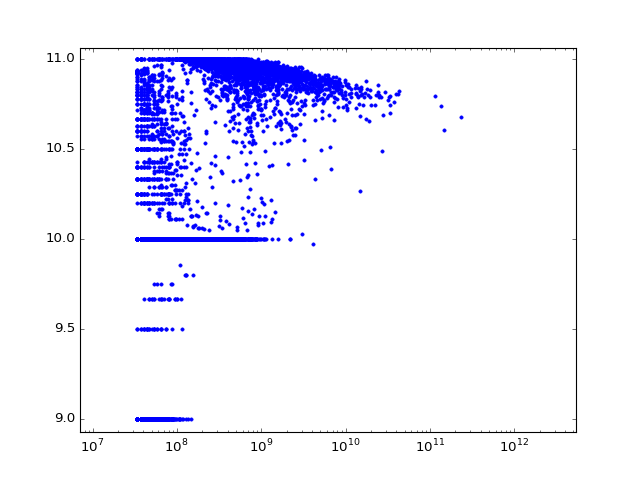

In [445]:
plt.figure()
# mask = l_max ==0
# plt.plot(cur_cat.part_mass_fine[mask], rho_max[mask],'.')
# mask = l_max ==1
# plt.plot(cur_cat.part_mass_fine[mask], rho_max[mask],'.')
# mask = l_max ==2
# plt.plot(cur_cat.part_mass_fine[mask], rho_max[mask],'.')
plt.plot(cur_cat.part_mass_fine, l_max,'.')
plt.xscale('log')
# plt.yscale('log')

<IPython.core.display.Javascript object>


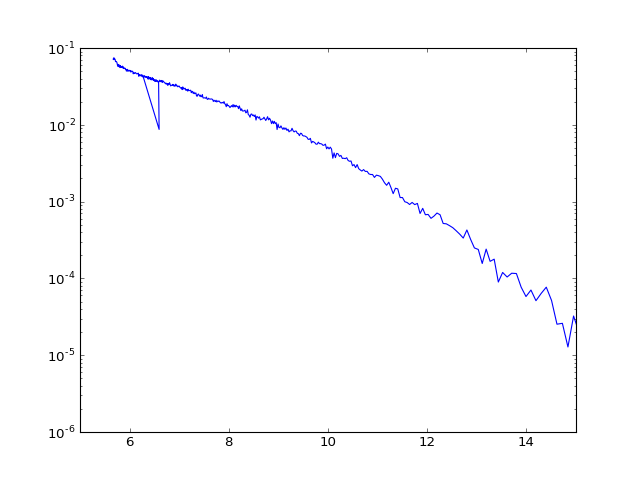

(5, 15)

In [106]:
plt.figure()
x=cur_run.param.avg.z
y=cur_run.param.avg.SFR
plt.semilogy(x,y)
plt.xlim(5,15)

In [ ]:
# cur_step=run1.step_00017
# cur_step=run2.step_00016
cur_step=run3.step_00020

cur_step.fof.gen(8)
cur_step.fof.get_mean_vel(force=0)
cur_step.fof.get_cells(cur_step.grid, force=1)
cur_step.fof.get_flux_r200(cur_step.grid, type="rad",force=1)

In [196]:
mask= cur_step.fof.star_flux!=0
w=cur_step.fof.mean_flux_rad[mask]/cur_step.fof.star_flux[mask]
print(w)

[ -1.10072282e-09  -2.94612939e-11   1.31265580e-09 ...,   1.98428866e-15
   0.00000000e+00   1.29079334e-10]


In [257]:
Nbins=10

cur_step=run2.step_00016
mh=cur_step.fof.part_mass_fine
Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)
_x=(Mbins[1:]+Mbins[:-1])/2

for fact in [0.25,0.5,0.75,1]:
# for fact in [1]:
    n=[]
    rad=[]
    hyd=[]
    lum=[]
    for cur_step in [run1.step_00017, run2.step_00016, run3.step_00020]:
        print(cur_step)

#         cur_step.fof.get_star(cur_step.star)
#         cur_step.fof.get_luminosity_UV(cur_step)
#         cur_step.fof.get_mean_vel(force=0)
#         cur_step.fof.get_cells(cur_step.grid, force=0)
        cur_step.fof.get_flux_r200(cur_step.grid, "rad", fact=fact,force=1)
#         cur_step.fof.get_flux_r200(cur_step.grid, "hydro", fact=fact)

        mh=cur_step.fof.part_mass_fine
        n1,_=np.histogram(mh,bins=Mbins)
        
        fact_name = ("%0.2f"%(fact)).replace(".","_")
        
        w=getattr(cur_step.fof, "mean_flux_rad_%s"%fact_name)        
        rad1,_=np.histogram(mh,bins=Mbins, weights=w)        
        
        w=getattr(cur_step.fof, "mean_flux_hydro_%s"%fact_name)        
        hyd1,_=np.histogram(mh,bins=Mbins, weights=w)
        lum1,_=np.histogram(mh,bins=Mbins, weights=cur_step.fof.star_flux_UV)

        n.append(n1)
        rad.append(rad1)
        hyd.append(hyd1)
        lum.append(lum1)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
skipped 2727/23352 = 11.68 %
get_flux_r200 done
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
skipped 2752/23302 = 11.81 %
get_flux_r200 done
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
skipped 2729/23367 = 11.68 %
get_flux_r200 done
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
skipped 2727/23352 = 11.68 %
get_flux_r200 done
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
skipped 2752/23302 = 11.81 %
get_flux_r200 done
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
1900

# STELLAR MASS

In [350]:
run1=io.Run(runset.runs[1].folder)

<IPython.core.display.Javascript object>


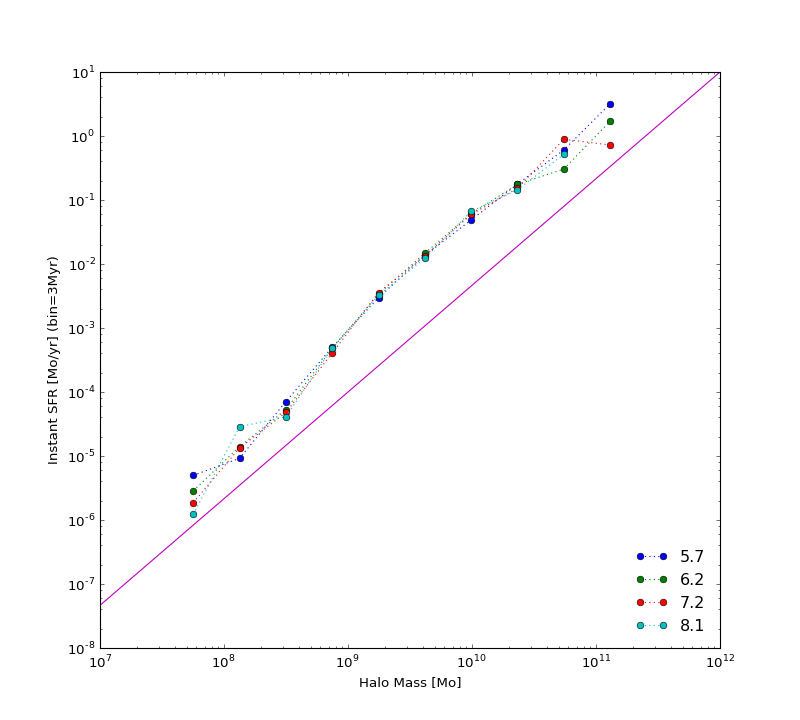

Reading /home/deparis/curie_data/data/8_8_gather_7/data/00017/halo/stars
star_age allready loaded, use force=1 to reload
Reading /home/deparis/curie_data/data/8_8_gather_7/data/00013/halo/stars
star_age allready loaded, use force=1 to reload
Reading /home/deparis/curie_data/data/8_8_gather_7/data/00010/halo/stars
star_age allready loaded, use force=1 to reload
Reading /home/deparis/curie_data/data/8_8_gather_7/data/00008/halo/stars
star_age allready loaded, use force=1 to reload


/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/deparis/.local/lib/python3.4/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in true_divide


In [369]:
plt.figure(figsize=(10,9))

Nbins=10

cur_step=run2.step_00016
mh=cur_step.fof.part_mass_fine
Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)
_x=(Mbins[1:]+Mbins[:-1])/2

# run1.step_00010.fof.gen(8)

# for cur_step in [run1.step_00017, run2.step_00016, run3.step_00020]:
for cur_step in [run1.step_00017, run1.step_00013, run1.step_00010, run1.step_00008 ]:

    cur_step.fof.get_star(cur_step.star)
    
    cur_step.star.age.read()
    z=1./cur_step.star.age.tsim-1
    cur_step.fof.get_instant_SFR(cur_step.star)

    mh=cur_step.fof.part_mass_fine
    
    n,_=np.histogram(mh,bins=Mbins)
    y,_=np.histogram(mh,bins=Mbins, weights= cur_step.fof.instant_sfr)
    y2,_=np.histogram(mh,bins=Mbins, weights= cur_step.fof.instant_sfr*cur_step.fof.instant_sfr)
    err=np.sqrt(y2/n - y*y/n/n) /np.sqrt(n)

    plt.errorbar(_x,y/n,fmt='o:', label="%0.1f"%z)
x=np.logspace(7,12,64)
y=x**(5./3)*10**-19
plt.plot(x,y)
plt.legend(frameon=False, loc=4 )
plt.xscale('log')
plt.yscale('log', nonposy='mask' )
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Instant SFR [Mo/yr] (bin=3Myr)')

<IPython.core.display.Javascript object>


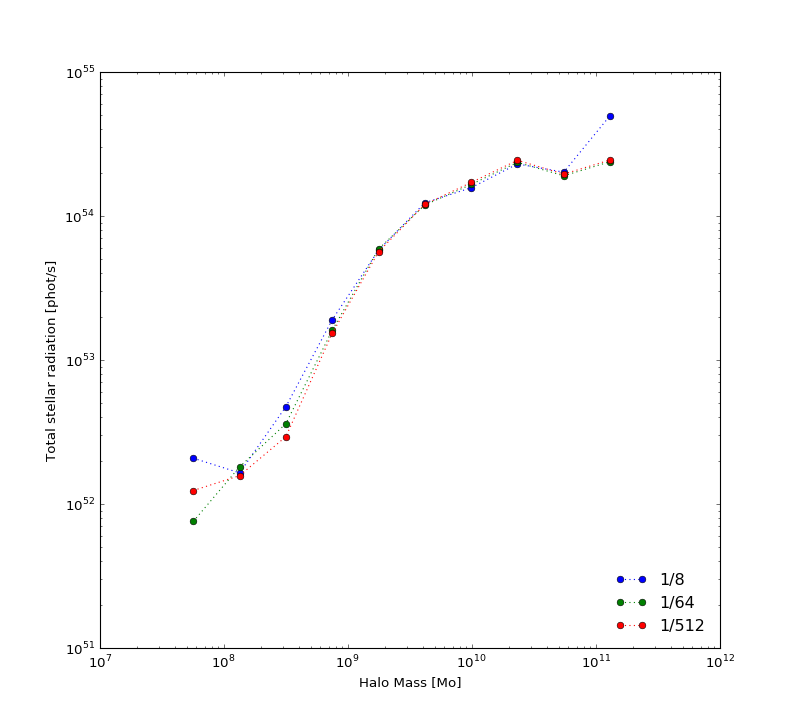

In [248]:
plt.figure(figsize=(10,9))

fact=1./(0.15**4)
fact=1.

plt.plot(_x,lum[1]*fact,'o:', label="1/8")
plt.plot(_x,lum[0]*fact,'o:', label="1/64")
plt.plot(_x,lum[2]*fact,'o:', label="1/512")

plt.legend(frameon=False, loc=4 )
plt.xscale('log')
plt.yscale('log', nonposy='mask' )
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Total stellar radiation [phot/s]')

<IPython.core.display.Javascript object>


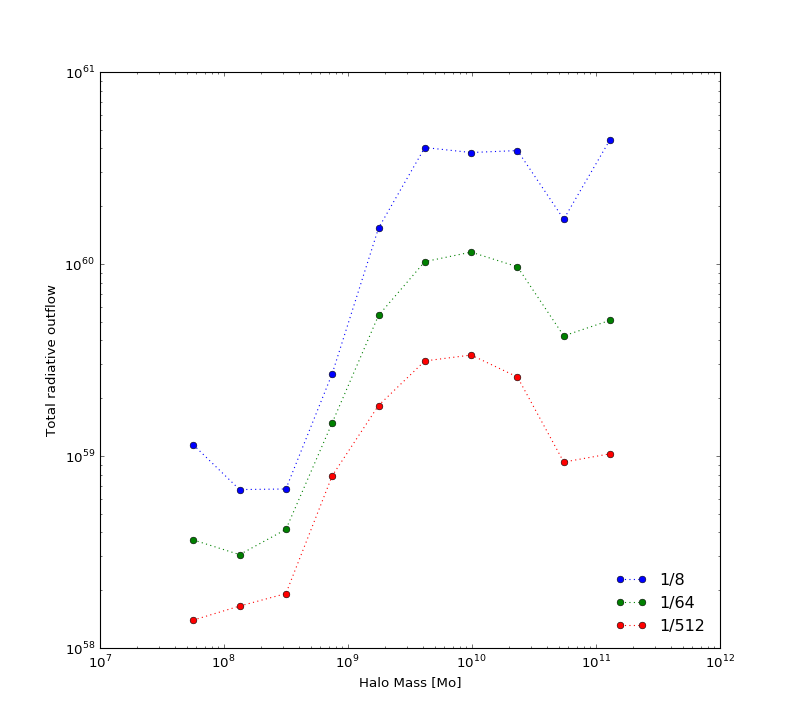

In [253]:
plt.figure(figsize=(10,9))

info=run1.param.info
fact=(0.15**4)*info.unit_l**2*info.unit_t
# fact=1

plt.plot(_x,rad[1]*fact,'o:', label="1/8")
plt.plot(_x,rad[0]*fact,'o:', label="1/64")
plt.plot(_x,rad[2]*fact,'o:', label="1/512")

plt.legend(frameon=False, loc=4 )
plt.xscale('log')
plt.yscale('log', nonposy='mask' )
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Total radiative outflow')
# plt.ylim(1e-9, 1e-3)

<IPython.core.display.Javascript object>


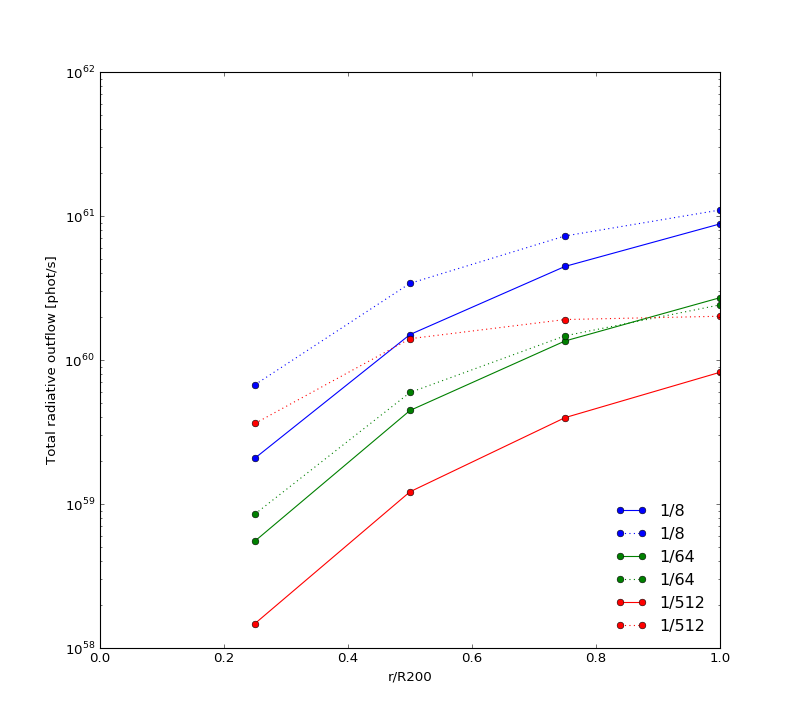

(0, 1)

In [259]:
plt.figure(figsize=(10,9))

x=[0.25,0.5,0.75,1]

info=run1.param.info          
rad_scale=  0.15**4 *info.unit_l**2 * info.unit_t

label=["1/8","1/64","1/512"]
color=["b","g","r"]
ls=["-",":"]

for istep, cur_step in enumerate([run2.step_00016, run1.step_00017, run3.step_00020]):
    Nbins=2
    Mbins=np.logspace(8, 12, Nbins+1)
    for ibin in range(Nbins):
        mh=cur_step.fof.part_mass_fine
        mask=np.where( (mh>=Mbins[ibin])  & (mh<Mbins[ibin+1]) )[0]        
        y=[]
        y.append(np.sum(cur_step.fof.mean_flux_rad_0_25[mask]))
        y.append(np.sum(cur_step.fof.mean_flux_rad_0_50[mask]))
        y.append(np.sum(cur_step.fof.mean_flux_rad_0_75[mask]))
        y.append(np.sum(cur_step.fof.mean_flux_rad_1_00[mask]))
        plt.plot(x,np.multiply(y,rad_scale),"o", ls=ls[ibin],c=color[istep],label=label[istep])

plt.legend(frameon=False, loc=4 )
plt.yscale('log', nonposy='mask' )
plt.xlabel('r/R200')
plt.ylabel('Total radiative outflow [phot/s]')
plt.xlim(0,1)

<IPython.core.display.Javascript object>


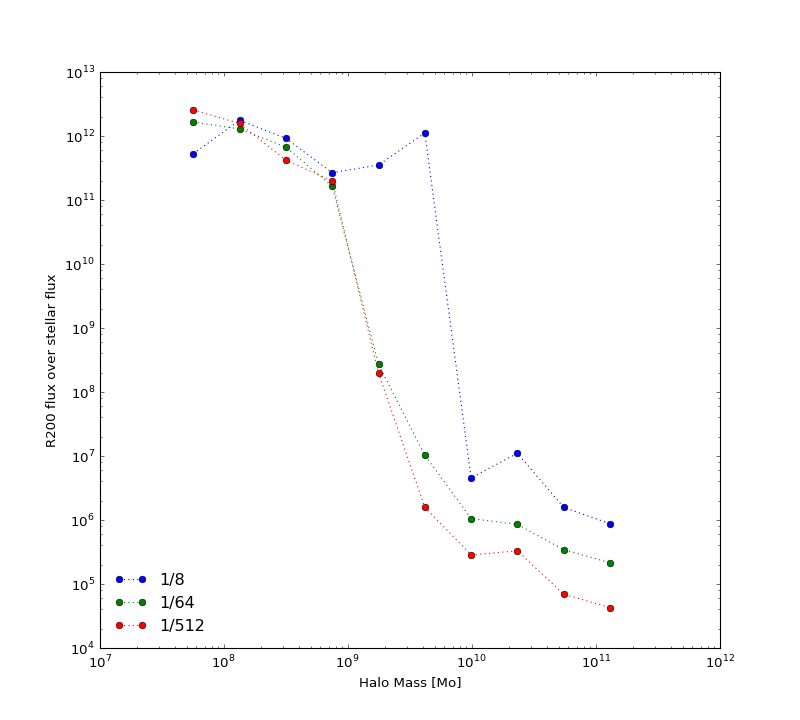

In [256]:
plt.figure(figsize=(10,9))

# rad_scale=  0.15**4 *info.unit_l**2 * info.unit_t

Nbins=10

labels=["1/8","1/64","1/512"]
for i,cur_step in enumerate([run2.step_00016, run1.step_00017, run3.step_00020]):

    if i==0:
        mh=cur_step.fof.part_mass_fine
        Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)
        _x=(Mbins[1:]+Mbins[:-1])/2
    
    mask= cur_step.fof.star_flux_UV!=0
    w=cur_step.fof.mean_flux_rad_1_00[mask]*rad_scale/cur_step.fof.star_flux_UV[mask]
    mh=cur_step.fof.part_mass_fine[mask]
    thresh=0
    n1,_=np.histogram(mh[w>thresh],bins=Mbins)
    rad1,_=np.histogram(mh[w>thresh],bins=Mbins, weights=w[w>thresh])
    plt.plot(_x,rad1/n1,'o:', label=labels[i])
        
#     plt.plot(mh,w,'.')

plt.legend(frameon=False, loc=3 )
plt.xscale('log')
plt.yscale('log', nonposy='mask' )
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('R200 flux over stellar flux')

<IPython.core.display.Javascript object>


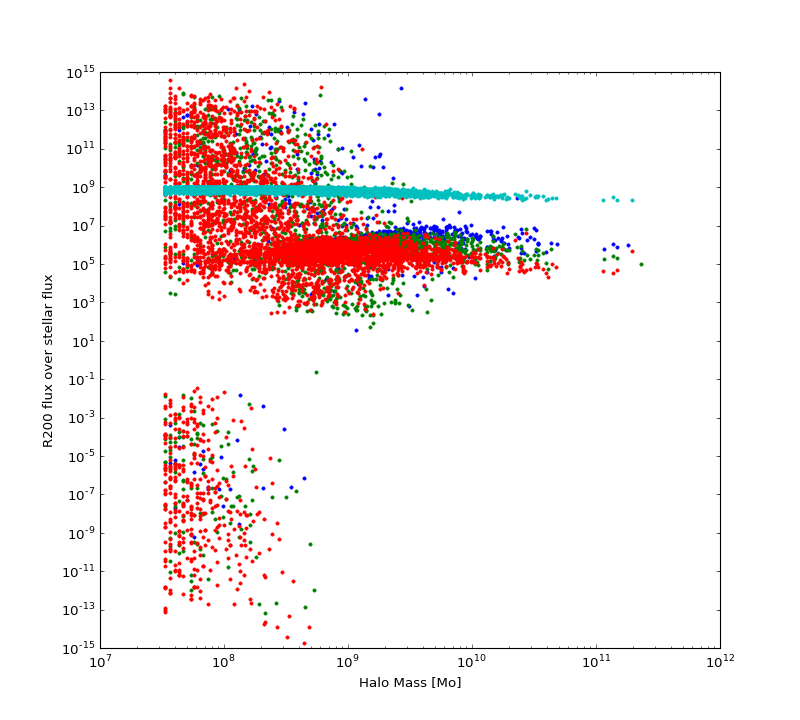

Reading /home/deparis/curie_data/data/8_8_gather_7/data/00016/halo/flux_r200_rad
Reading /home/deparis/curie_data/data/8_8_gather_7/data/00016/halo/stars
reading star_mass
reading star_age
Getting nfoftot
Reading fof masst
Reading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/flux_r200_rad
Reading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/stars
reading star_mass
reading star_age
Getting nfoftot
Reading fof masst
Reading /home/deparis/curie_data/data/8_8_gather_10/data/00020/halo/flux_r200_rad
Reading /home/deparis/curie_data/data/8_8_gather_10/data/00020/halo/stars
reading star_mass
reading star_age
Getting nfoftot
Reading fof masst


/home/deparis/.local/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [375]:
plt.figure(figsize=(10,9))

rad_scale=  0.15**4 *info.unit_l**2 * info.unit_t

# Nbins=10

labels=["1/8","1/64","1/512"]
for i,cur_step in enumerate([run2.step_00016, run1.step_00017, run3.step_00020]):
    
    cur_step.fof.get_flux_r200(cur_step.grid, "rad")
    cur_step.fof.get_star(cur_step.star)
    cur_step.fof.get_luminosity_UV(cur_step)
    
    mh=cur_step.fof.part_mass_fine        
    mask= cur_step.fof.star_flux_UV!=0
    w=cur_step.fof.mean_flux_rad_1_00[mask]*rad_scale/cur_step.fof.star_flux_UV[mask]
    
    plt.plot(mh[mask],w,'.')

plt.legend(frameon=False, loc=3 )
plt.xscale('log')
plt.yscale('log', nonposy='mask' )
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('R200 flux over stellar flux')

# HYDRO

<IPython.core.display.Javascript object>


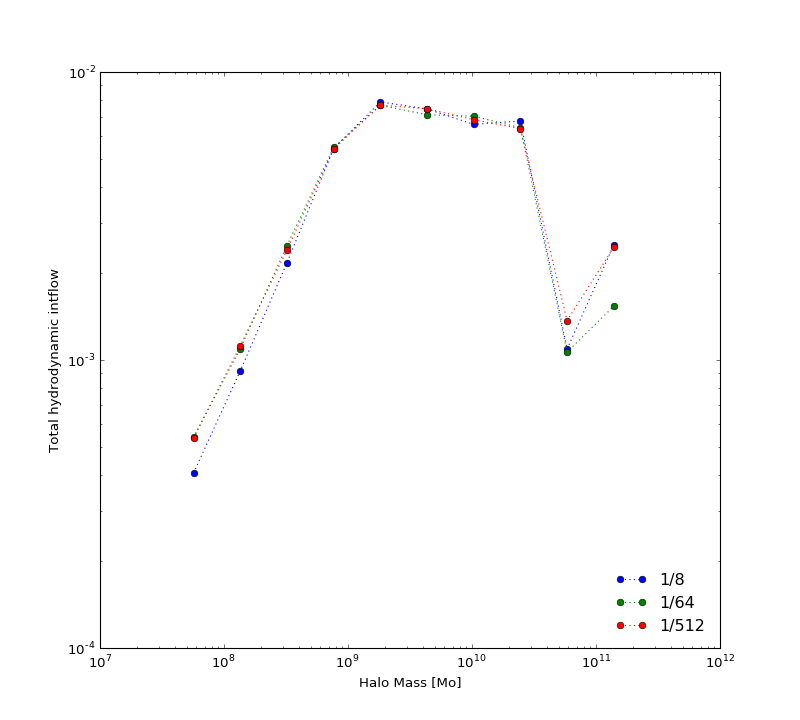

In [90]:
plt.figure(figsize=(10,9))
# plt.plot(_x,-hyd2/n2,'o:', label="1/8")
# plt.plot(_x,-hyd1/n1,'o:', label="1/64")
# plt.plot(_x,-hyd3/n3,'o:', label="1/512")

plt.plot(_x,-hyd2,'o:', label="1/8")
plt.plot(_x,-hyd1,'o:', label="1/64")
plt.plot(_x,-hyd3,'o:', label="1/512")

plt.legend(frameon=False,loc=4)
plt.xscale('log')
plt.yscale('log', nonposy='mask')
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Total hydrodynamic intflow')

# SUPERNOVAE

In [150]:
Nbins=10

cur_step.fof.get_part_mass_fine()

mh=cur_step.fof.part_mass_fine
Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)
_x=(Mbins[1:]+Mbins[:-1])/2

cur_step=run4.step_00012
mh=cur_step.fof.part_mass_fine
n1,_=np.histogram(mh,bins=Mbins)
# rad1,_=np.histogram(mh,bins=Mbins, weights=cur_step.fof.mean_flux_rad)
hyd1,_=np.histogram(mh,bins=Mbins, weights=cur_step.fof.mean_flux_hydro)

cur_step=run5.step_00011
mh=cur_step.fof.part_mass_fine
n2,_=np.histogram(mh,bins=Mbins)
# rad2,_=np.histogram(mh,bins=Mbins, weights=cur_step.fof.mean_flux_rad)
hyd2,_=np.histogram(mh,bins=Mbins, weights=cur_step.fof.mean_flux_hydro)

cur_step=run6.step_00020
mh=cur_step.fof.part_mass_fine
n3,_=np.histogram(mh,bins=Mbins)
# rad3,_=np.histogram(mh,bins=Mbins, weights=cur_step.fof.mean_flux_rad)
hyd3,_=np.histogram(mh,bins=Mbins, weights=cur_step.fof.mean_flux_hydro)


<IPython.core.display.Javascript object>


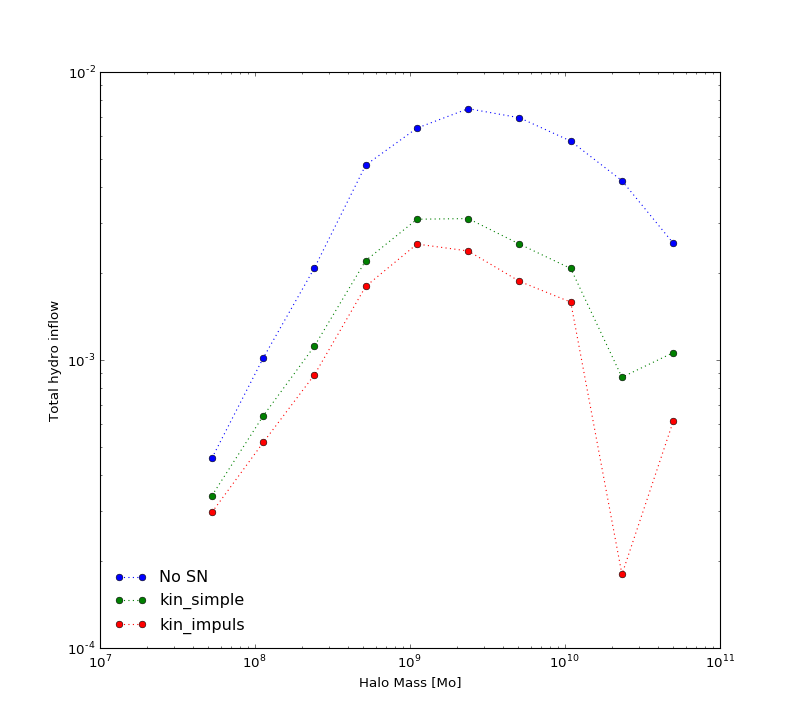

In [156]:
plt.figure(figsize=(10,9))
# plt.plot(_x,rad2/n2,'o:', label="1/8")
# plt.plot(_x,rad1/n1,'o:', label="1/64")
# plt.plot(_x,rad3/n3,'o:', label="1/512")

plt.plot(_x,-hyd1,'o:', label="No SN")
plt.plot(_x,-hyd2,'o:', label="kin_simple")
plt.plot(_x,-hyd3,'o:', label="kin_impuls")

plt.legend(frameon=False, loc=3 )
plt.xscale('log')
plt.yscale('log', nonposy='mask' )
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Total hydro inflow')

In [31]:
cur_step=run2.step_00016
cur_step=run1.step_00017
cur_step.fof.get_luminosity_UV(cur_step)

<IPython.core.display.Javascript object>


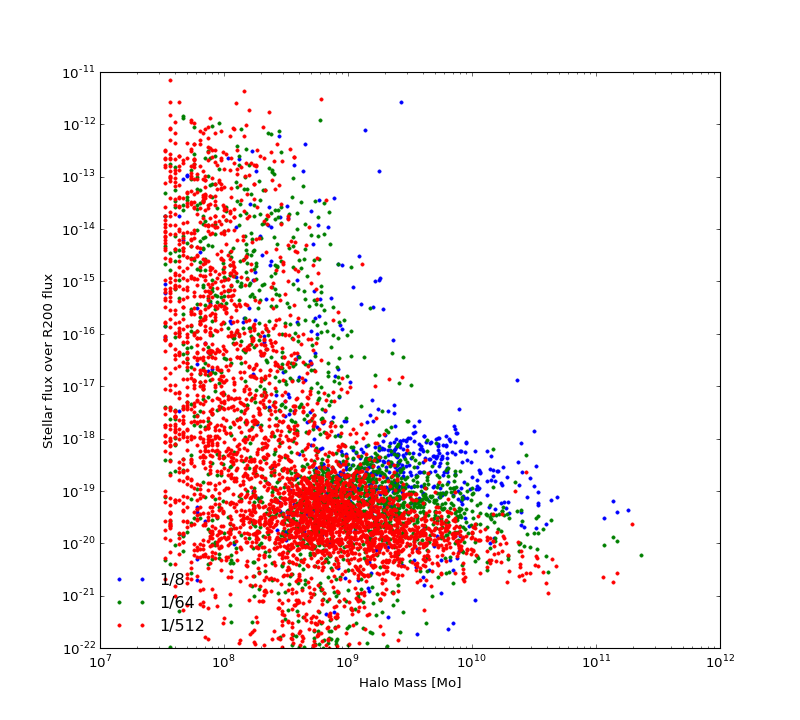

In [33]:
plt.figure(figsize=(10,9))

cur_step=run2.step_00016
mask= cur_step.fof.star_flux_UV!=0
w=cur_step.fof.mean_flux_rad[mask]/cur_step.fof.star_flux_UV[mask]
x=cur_step.fof.part_mass_fine[mask]
plt.plot(x[w>1e-22],w[w>1e-22],'.', label="1/8")

cur_step=run1.step_00017
mask= cur_step.fof.star_flux_UV!=0
w=cur_step.fof.mean_flux_rad[mask]/cur_step.fof.star_flux_UV[mask]
x=cur_step.fof.part_mass_fine[mask]
plt.plot(x[w>1e-22],w[w>1e-22],'.', label="1/64")


cur_step=run3.step_00020
mask= cur_step.fof.star_flux_UV!=0
w=cur_step.fof.mean_flux_rad[mask]/cur_step.fof.star_flux_UV[mask]
x=cur_step.fof.part_mass_fine[mask]
plt.plot(x[w>1e-22],w[w>1e-22],'.', label="1/512")


plt.legend(frameon=False, loc=3 )
plt.xscale('log')
plt.yscale('log', nonposy='mask' )
plt.xlabel('Halo Mass [Mo]')
plt.ylabel('Stellar flux over R200 flux')